# Data preprocessing
data source: https://www.kaggle.com/secareanualin/football-events  
This dataset has bunch of event information of the football match in European domestic leagues during 2011~2017.  
code by @Seungju182

## Load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
events = pd.read_csv('./football.csv')
info = pd.read_csv('./ginf.csv')
events.head()

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0


In [3]:
info.head()

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,NaN,NaN,NaN,NaN
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,NaN,NaN,NaN,NaN


In [4]:
events.shape

(941009, 22)

In [5]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941009 entries, 0 to 941008
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id_odsp        941009 non-null  object 
 1   id_event       941009 non-null  object 
 2   sort_order     941009 non-null  int64  
 3   time           941009 non-null  int64  
 4   text           941009 non-null  object 
 5   event_type     941009 non-null  int64  
 6   event_type2    214293 non-null  float64
 7   side           941009 non-null  int64  
 8   event_team     941009 non-null  object 
 9   opponent       941009 non-null  object 
 10  player         880009 non-null  object 
 11  player2        291310 non-null  object 
 12  player_in      51715 non-null   object 
 13  player_out     51738 non-null   object 
 14  shot_place     227459 non-null  float64
 15  shot_outcome   228498 non-null  float64
 16  is_goal        941009 non-null  int64  
 17  location       467067 non-nul

In [6]:
events.describe()

,sort_order,time,event_type,event_type2,side,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
count,941009.000000,941009.000000,941009.000000,214293.000000,941009.000000,227459.000000,228498.000000,941009.000000,467067.000000,229185.000000,941009.000000,229137.000000,941009.000000
mean,53.858826,49.663663,4.326575,12.233764,1.481170,5.733693,1.926555,0.025978,6.209073,1.624831,0.264332,1.281316,0.004876
std,32.014268,26.488977,2.995313,0.468850,0.499646,3.326100,0.797055,0.159071,5.421736,0.740400,0.655501,0.709394,0.069655
min,1.000000,0.000000,1.000000,12.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,27.000000,27.000000,2.000000,12.000000,1.000000,2.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000
50%,53.000000,51.000000,3.000000,12.000000,1.000000,5.000000,2.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000
75%,79.000000,73.000000,8.000000,12.000000,2.000000,9.000000,3.000000,0.000000,11.000000,2.000000,0.000000,1.000000,0.000000
max,180.000000,100.000000,11.000000,15.000000,2.000000,13.000000,4.000000,1.000000,19.000000,3.000000,4.000000,4.000000,1.000000


### events 전처리

In [7]:
events = events.drop('text, player_in, player_out, fast_break'.split(', '), axis=1)

In [8]:
'text, player_in, player_out, fast_break'.split(', ')

['text', 'player_in', 'player_out', 'fast_break']

In [9]:
events = events.loc[(events.event_type==1) & (events.event_type!=15)]
events.tail()

,id_odsp,id_event,sort_order,time,event_type,event_type2,side,event_team,opponent,player,player2,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation
940983,z5L2OT5E/,z5L2OT5E102,102,81,1,NaN,1,Atalanta,Sampdoria,remo freuler,NaN,2.0,3.0,0,15.0,1.0,0,1.0
940991,z5L2OT5E/,z5L2OT5E110,110,84,1,12.0,1,Atalanta,Sampdoria,alberto grassi,remo freuler,10.0,2.0,0,15.0,1.0,1,1.0
940992,z5L2OT5E/,z5L2OT5E111,111,86,1,12.0,1,Atalanta,Sampdoria,alejandro gomez,andrea petagna,5.0,1.0,0,9.0,1.0,1,1.0
940993,z5L2OT5E/,z5L2OT5E112,112,87,1,12.0,2,Sampdoria,Atalanta,fabio quagliarella,luis muriel,5.0,1.0,0,15.0,1.0,1,1.0
941006,z5L2OT5E/,z5L2OT5E125,125,93,1,12.0,2,Sampdoria,Atalanta,fabio quagliarella,lucas torreira,8.0,2.0,0,9.0,1.0,1,3.0


### info 전처리
* id_odsp: unique id for the match
* month: month when the match was played
* season: season when the match was played
* ft_scored: amount of goals scored by the team in that match
* ft_conceded: amount of goals conceded by the team in that match
* odd_win: odds for winning 
* odd_draw: odds for draw
* result: result of the match (1: win, 0: draw, -1: lose)
* expected_win: expected result of the match (1: win, 0: draw, -1: lose)

In [10]:
info = info.drop('link_odsp, adv_stats, league, country, odd_over, odd_under, odd_bts, odd_bts_n'.split(', '), axis=1)

In [11]:
info['month'] = pd.DatetimeIndex(info.date).month

In [12]:
info = info.drop('date', axis=1)

In [13]:
info['win_h'] = np.sign(info.fthg - info.ftag)
info['expected_h'] = info['odd_h, odd_d, odd_a'.split(', ')].idxmin(axis=1).replace({'odd_h': 1, 'odd_d': 0, 'odd_a': -1})

In [14]:
info.tail()

,id_odsp,season,ht,at,fthg,ftag,odd_h,odd_d,odd_a,month,win_h,expected_h
10107,xAkY8l6R/,2017,Genoa,Crotone,2,2,1.97,4.35,8.0,1,0,1
10108,xSU9scI9/,2017,Chelsea,Hull,2,0,1.19,8.50,20.0,1,1,1
10109,xY7uZwOI/,2017,AS Monaco,Lorient,4,0,1.32,6.24,11.5,1,1,1
10110,YyeGxMX8/,2017,Real Betis,Sporting Gijon,0,0,1.74,4.07,5.9,1,0,1
10111,z5L2OT5E/,2017,Atalanta,Sampdoria,1,0,1.79,3.96,5.4,1,1,1


In [15]:
def select_by_team_info(team):
    
    home = info.loc[info['ht']==team]
    home = home.drop('odd_a', axis=1)
    home = home.rename(columns={'odd_h': 'odd_win', 
                                'expected_h': 'expected_win', 
                                'win_h': 'result', 
                                'fthg': 'ft_scored',
                                'ftag': 'ft_conceded'
                               })
    home = home.sort_index(axis=1)
    
    away = info.loc[info['at']==team]
    away = away.rename(columns={'odd_a': 'odd_win',
                                'fthg': 'ft_conceded',
                                'ftag': 'ft_scored'
                               })
    away['expected_win'] = away['expected_h'].mul(-1)
    away['result'] = away['win_h'].mul(-1)
    away = away.drop('odd_h, win_h, expected_h'.split(', '), axis = 1)
    away = away.sort_index(axis=1)
    
    df = pd.concat([home, away], sort=True).sort_index()
    df = df.rename(columns={'odd_d': 'odd_draw'})
    df = df.drop('ht, at'.split(', '), axis=1)
    
    return df

### events + info dataframe

In [16]:
def get_team_events(team):
    
    team_event = events.loc[events.event_team==team]
    
    # merge with info using select_by_team_info function (inner join with id_odsp)
    df = pd.merge(team_event, select_by_team_info(team), on='id_odsp')
    
    df = df.drop('id_event, sort_order, event_type, event_team'.split(', '), axis=1)
    
    return df

In [17]:
madrid = get_team_events('Real Madrid')
barcelona = get_team_events('Barcelona')

## define Player class

In [18]:
class Player():
    def __init__(self, name, events):
        """
        Args
        - name: player's name
        - events: event dataframe (pre-processed)
        """
        self.name = name
        self.events = events
        
    def shoot(self):
        """
        return type: pd.Dataframe
        - shooting events in events df
        """
        return self.events.loc[self.events.player==self.name]
    
    
    def key_pass(self):
        """
        return type: pd.Dataframe
        - key pass events in events df
        """
        return self.events.loc[self.events.player2==self.name]
    
    
    def goal(self):
        """
        return type: pd.Dataframe
        - goal events in events df
        """
        return self.shoot().loc[self.events.is_goal==1]
    
    
    def assist(self):
        """
        return type: pd.Dataframe
        - assist events in events df
        """
        return self.key_pass().loc[self.events.is_goal==1]
    
    def get_core_stats(self, key):
        df = self.goal()[['is_goal', key]].groupby(key).count().rename(columns={'is_goal': 'goals'})
        df['assists'] = self.assist()[['is_goal', key]].groupby(key).count()
        df['shots'] = self.shoot()[['is_goal', key]].groupby(key).count()
        df['key_pass'] = self.key_pass()[['is_goal', key]].groupby(key).count()
        df['num_matches'] = self.events[['id_odsp', key]].groupby(key).nunique()['id_odsp']
        df['goal_per_shot'] = df['goals'] / df['shots']
        df['goal_per_match'] = df['goals'] / df['num_matches']
        df['assist_per_match'] = df['assists'] / df['num_matches']
        return df
    
    def season_stats(self):
        return self.get_core_stats('season')
    
    def monthly_stats(self):
        return self.get_core_stats('month')
    
    def side_stats(self):
        df = self.get_core_stats('side')
        df = df.rename(index={1: 'home', 2: 'away'})
        return df
    
    def result_stats(self):
        df = self.get_core_stats('result')
        df = df.rename(index={1: 'win', 0: 'draw', -1: 'lose'})
        return df
    
    def expected_result_stats(self):
        df = self.get_core_stats('expected_win')
        df = df.rename(index={1: 'win', 0: 'draw', -1: 'lose'})
        return df
    
    def get_shoot_stats(self, key):
        return self.shoot().groupby(key).count()['id_odsp'].rename(columns={'id_odsp': 'shots'})
    
    def get_goal_stats(self, key):
        return self.goal().groupby(key).count()['id_odsp'].rename(columns={'id_odsp': 'goals'})
    
    def shot_stats_with_key(self, key):
        """
        keys available
        - shot_place: placement of the shot
        - shot_outcome: on target, off target, blocked, hit the post
        - location: location on the pitch where player shot
        - bodypart: right foot, left foot, head
        - situation: open play, set piece, corner, free kick
        """
        df = pd.concat([self.get_goal_stats(key), self.get_shoot_stats(key)], axis=1)
        df = df.rename(columns={0: 'goals', 1: 'shots'})
        df['goal_per_shot'] = df['goals'] / df['shots']
        df['shot_ratio'] = df['shots'] / df['shots'].sum()
        df['goal_ratio'] = df['goals'] / df['goals'].sum()
        return df.fillna(0)

In [19]:
cr7 = Player('cristiano ronaldo', madrid)

In [20]:
lm10 = Player('lionel messi', barcelona)

## Season-wise Comparison

In [21]:
cr7_season = cr7.season_stats()
lm10_season = lm10.season_stats()

In [22]:
cr7_season

,goals,assists,shots,key_pass,num_matches,goal_per_shot,goal_per_match,assist_per_match
season,,,,,,,,
2012,43,12,235,56,34,0.182979,1.264706,0.352941
2013,34,10,234,62,37,0.145299,0.918919,0.270270
2014,31,9,215,48,38,0.144186,0.815789,0.236842
2015,44,9,203,55,34,0.216749,1.294118,0.264706
2016,33,11,219,49,37,0.150685,0.891892,0.297297
2017,12,2,82,11,18,0.146341,0.666667,0.111111


In [23]:
lm10_season

,goals,assists,shots,key_pass,num_matches,goal_per_shot,goal_per_match,assist_per_match
season,,,,,,,,
2012,50,15,192,82,35,0.260417,1.428571,0.428571
2013,46,12,162,46,38,0.283951,1.210526,0.315789
2014,28,11,158,75,38,0.177215,0.736842,0.289474
2015,40,18,168,86,34,0.238095,1.176471,0.529412
2016,26,16,154,70,37,0.168831,0.702703,0.432432
2017,15,3,80,40,19,0.187500,0.789474,0.157895


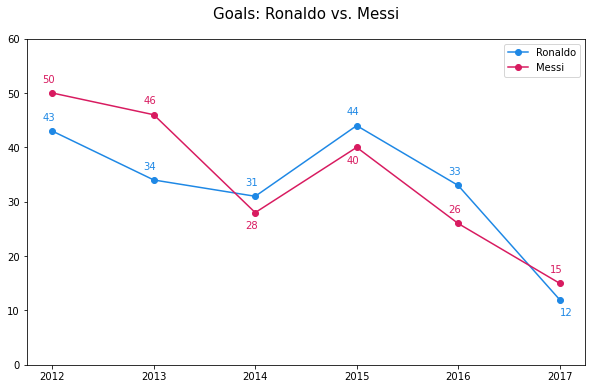

In [24]:
fig = plt.figure(figsize=(10,6))
ax = fig.subplots()
ax.set_title("Goals: Ronaldo vs. Messi", fontdict={'fontsize': 15}, pad=20)
ax.plot(cr7_season.index, cr7_season.goals, color='#1E88E5', label='Ronaldo', marker='o')
ax.plot(lm10_season.index, lm10_season.goals, color = '#D81B60', label='Messi', marker='o')

for idx, p in enumerate(zip(ax.get_xticks(), cr7_season.goals)):
    if idx < cr7_season.goals.shape[0]-1:
        ax.text(p[0]+.9, p[1]+2, p[1], color='#1E88E5')
    else:
        ax.text(p[0]+1, p[1]-3, p[1], color='#1E88E5')
        
for idx, p in enumerate(zip(ax.get_xticks(), lm10_season.goals)):
    if idx in [0, 1, 4, 5]:
        ax.text(p[0]+.9, p[1]+2, p[1], color='#D81B60')
    else:
        ax.text(p[0]+.9, p[1]-3, p[1], color='#D81B60')
ax.set_ylim(0, 60)
plt.legend()
plt.show()

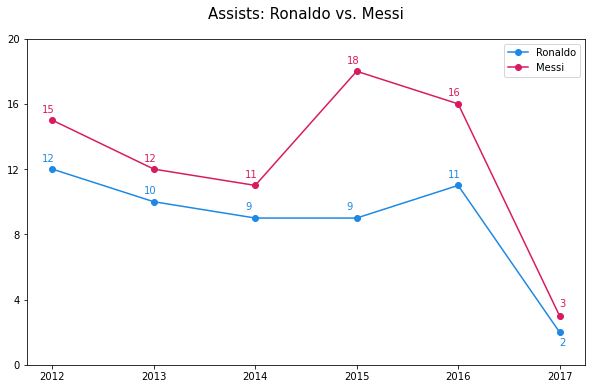

In [25]:
fig = plt.figure(figsize=(10,6))
ax = fig.subplots()
ax.set_title("Assists: Ronaldo vs. Messi", fontdict={'fontsize': 15}, pad=20)
ax.plot(cr7_season.index, cr7_season.assists, color='#1E88E5', label='Ronaldo', marker='o')
ax.plot(lm10_season.index, lm10_season.assists, color = '#D81B60', label='Messi', marker='o')

for idx, p in enumerate(zip(ax.get_xticks(), cr7_season.assists)):
    if idx < cr7_season.assists.shape[0]-1:
        ax.text(p[0]+.9, p[1]+.5, p[1], color='#1E88E5')
    else:
        ax.text(p[0]+1, p[1]-.8, p[1], color='#1E88E5')
        
for idx, p in enumerate(zip(ax.get_xticks(), lm10_season.assists)):
    if idx < cr7_season.assists.shape[0]-1:
        ax.text(p[0]+.9, p[1]+.5, p[1], color='#D81B60')
    else:
        ax.text(p[0]+1, p[1]+.6, p[1], color='#D81B60')
        
ax.set_ylim(0, 20)
ax.set_yticks(range(0,21,4))
plt.legend()
plt.show()

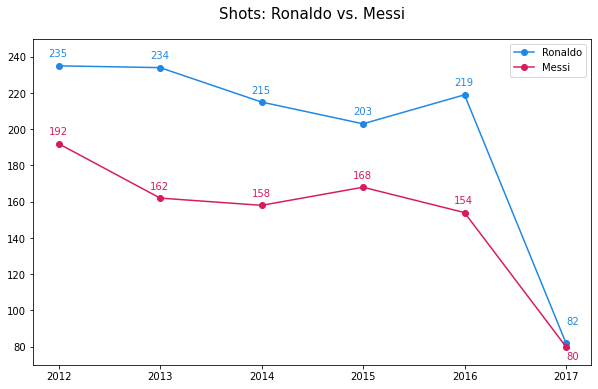

In [26]:
fig = plt.figure(figsize=(10,6))
ax = fig.subplots()
ax.set_title("Shots: Ronaldo vs. Messi", fontdict={'fontsize': 15}, pad=20)
ax.plot(cr7_season.index, cr7_season.shots, color='#1E88E5', label='Ronaldo', marker='o')
ax.plot(lm10_season.index, lm10_season.shots, color = '#D81B60', label='Messi', marker='o')

for idx, p in enumerate(zip(ax.get_xticks(), cr7_season.shots)):
    if idx < cr7_season.shots.shape[0]-1:
        ax.text(p[0]+.9, p[1]+5, p[1], color='#1E88E5')
    else:
        ax.text(p[0]+1, p[1]+10, p[1], color='#1E88E5')
        
for idx, p in enumerate(zip(ax.get_xticks(), lm10_season.shots)):
    if idx < cr7_season.shots.shape[0]-1:
        ax.text(p[0]+.9, p[1]+5, p[1], color='#D81B60')
    else:
        ax.text(p[0]+1, p[1]-7, p[1], color='#D81B60')
        
ax.set_ylim(70, 250)
plt.legend()
plt.show()

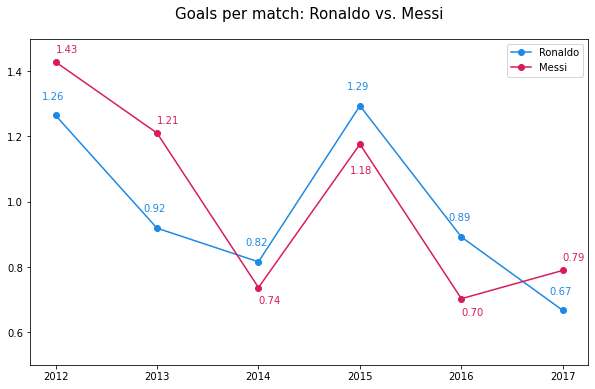

In [27]:
fig = plt.figure(figsize=(10,6))
ax = fig.subplots()
ax.set_title("Goals per match: Ronaldo vs. Messi", fontdict={'fontsize': 15}, pad=20)
ax.plot(cr7_season.index, cr7_season.goal_per_match, color='#1E88E5', label='Ronaldo', marker='o')
ax.plot(lm10_season.index, lm10_season.goal_per_match, color = '#D81B60', label='Messi', marker='o')

for p in zip(ax.get_xticks(), cr7_season.goal_per_match):
    ax.text(p[0]+.87, p[1]+.05, "{:.2f}".format(p[1]), color='#1E88E5')
    
for idx, p in enumerate(zip(ax.get_xticks(), lm10_season.goal_per_match)):
    if idx in [0, 1, 5]:
        ax.text(p[0]+1, p[1]+0.03, "{:.2f}".format(p[1]), color='#D81B60')
    elif idx in [2, 4]:
        ax.text(p[0]+1, p[1]-0.05, "{:.2f}".format(p[1]), color='#D81B60')
    else:
        ax.text(p[0]+.9, p[1]-0.09, "{:.2f}".format(p[1]), color='#D81B60')


ax.set_ylim(0.5, 1.5)
plt.legend()
plt.show()

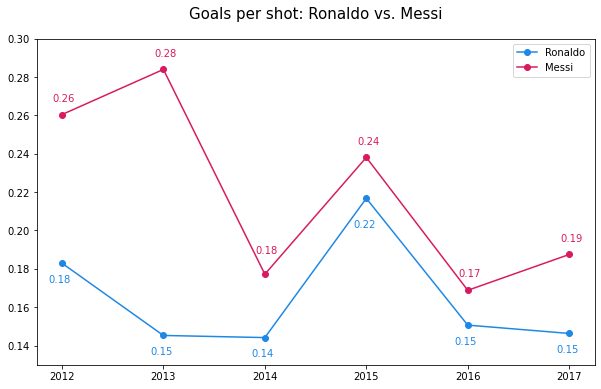

In [28]:
fig = plt.figure(figsize=(10,6))
ax = fig.subplots()
ax.set_title("Goals per shot: Ronaldo vs. Messi", fontdict={'fontsize': 15}, pad=20)
ax.plot(cr7_season.index, cr7_season.goal_per_shot, color='#1E88E5', label='Ronaldo', marker='o')
ax.plot(lm10_season.index, lm10_season.goal_per_shot, color = '#D81B60', label='Messi', marker='o')

for idx, p in enumerate(zip(ax.get_xticks(), cr7_season.goal_per_shot)):
    if idx != 3:
        ax.text(p[0]+.87, p[1]-0.01, "{:.2f}".format(p[1]), color='#1E88E5')
    else:
        ax.text(p[0]+.87, p[1]-0.015, "{:.2f}".format(p[1]), color='#1E88E5')
    
for idx, p in enumerate(zip(ax.get_xticks(), lm10_season.goal_per_shot)):
    if idx != 2:
        ax.text(p[0]+.91, p[1]+0.007, "{:.2f}".format(p[1]), color='#D81B60')
    else:
        ax.text(p[0]+.91, p[1]+0.011, "{:.2f}".format(p[1]), color='#D81B60')

ax.set_ylim(0.13, 0.3)
plt.legend()
plt.show()

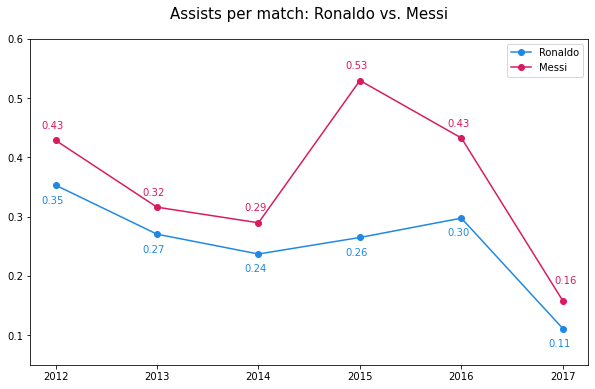

In [29]:
fig = plt.figure(figsize=(10,6))
ax = fig.subplots()
ax.set_title("Assists per match: Ronaldo vs. Messi", fontdict={'fontsize': 15}, pad=20)
ax.plot(cr7_season.index, cr7_season.assist_per_match, color='#1E88E5', label='Ronaldo', marker='o')
ax.plot(lm10_season.index, lm10_season.assist_per_match, color = '#D81B60', label='Messi', marker='o')

for p in zip(ax.get_xticks(), cr7_season.assist_per_match):
    ax.text(p[0]+.86, p[1]-0.03, "{:.2f}".format(p[1]), color='#1E88E5')
    
for idx, p in enumerate(zip(ax.get_xticks(), lm10_season.assist_per_match)):
    if idx != 5:
        ax.text(p[0]+.86, p[1]+0.02, "{:.2f}".format(p[1]), color='#D81B60')
    else:
        ax.text(p[0]+.92, p[1]+0.03, "{:.2f}".format(p[1]), color='#D81B60')

ax.set_ylim(0.05, 0.6)
plt.legend()
plt.show()